In [ ]:
!pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=d2f3bcaaabe1b9147fe2f059d6265416b42c2a8bb46b75575a1eefbd8436c2a3
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalli

In [ ]:
import tflearn

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import keras
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
import tflearn.datasets.oxflower17 as oxflower17
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.models import Sequential

In [ ]:
X,Y = oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
Y

array([ 5,  1,  3, ..., 15, 15, 10])

In [ ]:
from keras.utils import to_categorical

In [ ]:
len(np.unique(Y))

17

In [ ]:
X_train = X.astype("float32") / 255.0

In [ ]:

y_train = to_categorical(Y,num_classes=17)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_train

array([[[[2.1991543e-03, 2.3221839e-03, 1.6301422e-03],
         [1.8300654e-03, 1.9530950e-03, 1.2610535e-03],
         [1.3379470e-03, 1.4455979e-03, 7.6893502e-04],
         ...,
         [1.0918878e-03, 1.3533257e-03, 8.1507111e-04],
         [9.9961564e-04, 1.4302192e-03, 8.3044986e-04],
         [4.3060363e-04, 9.2272204e-04, 3.2295272e-04]],

        [[2.1530183e-03, 2.3221839e-03, 1.5532487e-03],
         [1.7685506e-03, 1.9530950e-03, 1.1841600e-03],
         [1.3687044e-03, 1.5378700e-03, 7.9969241e-04],
         ...,
         [1.3379470e-03, 1.6301422e-03, 9.3810074e-04],
         [1.0918878e-03, 1.5071126e-03, 7.8431371e-04],
         [6.4590544e-04, 1.1072665e-03, 3.6908881e-04]],

        [[1.3071896e-03, 1.5993848e-03, 6.9204153e-04],
         [1.3379470e-03, 1.6147635e-03, 7.3817762e-04],
         [1.1072665e-03, 1.3687044e-03, 5.2287587e-04],
         ...,
         [1.0303730e-03, 1.3225683e-03, 4.9211847e-04],
         [9.0734335e-04, 1.2764322e-03, 3.9984621e-04],
  

In [ ]:
print(X_train.shape)

(1360, 224, 224, 3)


In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape =(224,224,3),filters = 64, kernel_size= (3,3),padding = "same",activation="relu"))
model.add(Conv2D(filters=64, kernel_size = (3,3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(17,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,validation_split=0.2,verbose=1,batch_size=64,shuffle=True,epochs=1)

NameError: name 'model' is not defined

In [ ]:
pip install tensorflow==2.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 46.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Unins

In [ ]:
pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=a93b8000b4e632f9be5282b31fc2f2e2624e1bfac032344fbf54a2e0320bb9d5
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [ ]:
import tflearn


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### pre-trained

In [ ]:
import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view"
fileId  = url.split("/")[-2]
print("file id name",fileId)
prefix = "https://drive.google.com/uc?/export=download&id="
gdown.download(prefix+fileId,"catAndDog.zip")
print("finish")

file id name 12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: /content/catAndDog.zip
100%|██████████| 9.09M/9.09M [00:00<00:00, 74.3MB/s]

finish


In [ ]:
!unzip catAndDog.zip

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir = "/content/train"
validation_data_dir = "/content/validation"

num_train_sample = 2000
num_validation_sample = 800

epochs = 3
batch_size = 16


In [ ]:
base_model = VGG16(include_top= False, weights="imagenet",input_shape=(224,224,3))


In [ ]:
for layer in base_model.layers :
    print(layer)

In [ ]:
for layer in base_model.layers :
    layer.trainable = False

In [ ]:
from keras.layers import Dropout

In [ ]:

model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [ ]:
## preprocessing of traindata and validation data

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train_genrator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size= (224,224),
    batch_size = batch_size,
    class_mode = "binary"
)

validation_genrator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size= (224,224),
    batch_size = batch_size,
    class_mode = "binary"
)



Found 337 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


In [ ]:
model.fit(
    train_genrator,
    steps_per_epoch = num_train_sample//batch_size,
    epochs = epochs,
    validation_data = validation_genrator,
    validation_steps = num_validation_sample//batch_size
)

Epoch 1/3
 22/125 [====>.........................] - ETA: 16:02 - loss: 6.8131 - accuracy: 0.8457

125/125 [==============================] - 250s 2s/step - loss: 6.8131 - accuracy: 0.8457 - val_loss: 6.3589 - val_accuracy: 0.9322


In [ ]:
model.save("dog_cat_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

In [ ]:
newModel = load_model("dog_cat_classifier.h5")

In [ ]:

newModel

In [ ]:
for layer in newModel.layers :
    print(layer)

In [ ]:
from keras.preprocessing import image

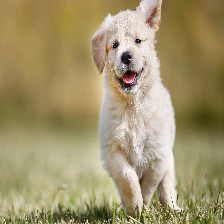

In [ ]:
imagePath = "/content/DogImage.webp"
img = image.load_img(imagePath,target_size=(224,224))
img

In [ ]:
img_array = image.img_to_array(img)
img_array

array([[[167., 136.,  89.],
        [166., 138.,  88.],
        [166., 138.,  88.],
        ...,
        [123.,  96.,  53.],
        [117.,  95.,  52.],
        [117.,  92.,  46.]],

       [[165., 137.,  85.],
        [166., 138.,  88.],
        [168., 140.,  88.],
        ...,
        [117.,  97.,  53.],
        [117.,  95.,  50.],
        [113.,  95.,  51.]],

       [[163., 135.,  83.],
        [164., 136.,  86.],
        [165., 137.,  85.],
        ...,
        [115.,  97.,  53.],
        [116.,  96.,  48.],
        [115.,  95.,  47.]],

       ...,

       [[140., 133.,  81.],
        [169., 174., 111.],
        [183., 182., 133.],
        ...,
        [144., 151., 110.],
        [115., 111.,  76.],
        [204., 197., 158.]],

       [[133., 121.,  68.],
        [121., 125.,  62.],
        [169., 176., 119.],
        ...,
        [153., 150., 112.],
        [128., 115.,  74.],
        [131., 128.,  81.]],

       [[127., 124.,  68.],
        [126., 134.,  72.],
        [159., 1

In [ ]:
img_array_new = img_array.reshape(1,224,224,3)
img_array_new

array([[[[167., 136.,  89.],
         [166., 138.,  88.],
         [166., 138.,  88.],
         ...,
         [123.,  96.,  53.],
         [117.,  95.,  52.],
         [117.,  92.,  46.]],

        [[165., 137.,  85.],
         [166., 138.,  88.],
         [168., 140.,  88.],
         ...,
         [117.,  97.,  53.],
         [117.,  95.,  50.],
         [113.,  95.,  51.]],

        [[163., 135.,  83.],
         [164., 136.,  86.],
         [165., 137.,  85.],
         ...,
         [115.,  97.,  53.],
         [116.,  96.,  48.],
         [115.,  95.,  47.]],

        ...,

        [[140., 133.,  81.],
         [169., 174., 111.],
         [183., 182., 133.],
         ...,
         [144., 151., 110.],
         [115., 111.,  76.],
         [204., 197., 158.]],

        [[133., 121.,  68.],
         [121., 125.,  62.],
         [169., 176., 119.],
         ...,
         [153., 150., 112.],
         [128., 115.,  74.],
         [131., 128.,  81.]],

        [[127., 124.,  68.],
       

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
preprocessedImg = preprocess_input(img_array_new)
preprocessedImg

array([[[[-14.939003 ,  19.221    ,  43.32     ],
         [-15.939003 ,  21.221    ,  42.32     ],
         [-15.939003 ,  21.221    ,  42.32     ],
         ...,
         [-50.939003 , -20.779    ,  -0.6800003],
         [-51.939003 , -21.779    ,  -6.6800003],
         [-57.939003 , -24.779    ,  -6.6800003]],

        [[-18.939003 ,  20.221    ,  41.32     ],
         [-15.939003 ,  21.221    ,  42.32     ],
         [-15.939003 ,  23.221    ,  44.32     ],
         ...,
         [-50.939003 , -19.779    ,  -6.6800003],
         [-53.939003 , -21.779    ,  -6.6800003],
         [-52.939003 , -21.779    , -10.68     ]],

        [[-20.939003 ,  18.221    ,  39.32     ],
         [-17.939003 ,  19.221    ,  40.32     ],
         [-18.939003 ,  20.221    ,  41.32     ],
         ...,
         [-50.939003 , -19.779    ,  -8.68     ],
         [-55.939003 , -20.779    ,  -7.6800003],
         [-56.939003 , -21.779    ,  -8.68     ]],

        ...,

        [[-22.939003 ,  16.221    ,  1

In [ ]:
y_predict = newModel.predict(preprocessedImg)
y_predict

1/1 [==============================] - 1s 736ms/step


array([[1.]], dtype=float32)

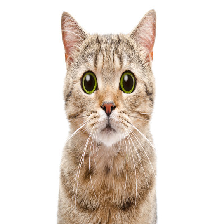

In [ ]:
img2 = image.load_img("catImage.jpg",target_size=(224,224))
img2

In [ ]:
img2 = image.img_to_array(img2)


In [ ]:
img2 = img2.reshape(1,224,224,3)
img2.shape

(1, 224, 224, 3)

In [ ]:
preprocessedImg2 = preprocess_input(img2)
preprocessedImg2

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [ ]:
newModel.predict(preprocessedImg2)

1/1 [==============================] - 1s 902ms/step


array([[0.]], dtype=float32)

In [ ]:
from keras.applications.vgg16 import decode_predictions

In [ ]:
decode_predictions()

In [ ]:
newModel.outputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_4')>]

In [ ]:
newModel.get_output_at

<bound method Layer.get_output_at of <keras.src.engine.sequential.Sequential object at 0x7fa51c3f3940>>

In [ ]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_4')>

In [ ]:
model.output_names

['dense_4']

In [ ]:
model.get

In [ ]:
model.output_shape[-1]

1

In [ ]:
decode_predictions(y_predict,top=1)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 1)

In [ ]:
model.predict(preprocessedImg)

1/1 [==============================] - 0s 133ms/step


array([[1.]], dtype=float32)